<a href="https://colab.research.google.com/github/shushantbk16/ML_Deepdive/blob/main/Practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv('CarPred.csv')
df.head()

,make,transmission_type,seats_cop,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_patrol,seller_dealer,seller_self,year,km_driven,engine,max_power,model,selling_price
0,hyundai,0,0,0,1,0,0,1,0,0,0,1,2009,42945,2492,287,verna,210447.937555
1,toyota,0,0,0,1,0,0,0,0,1,1,0,2003,176401,3240,88,corolla,272870.715932
2,ford,1,0,0,0,0,0,0,0,1,1,1,2018,46852,3250,169,aspire,251387.190744
3,honda,1,0,0,0,0,1,0,0,0,1,1,2014,162580,1317,99,jazz,139196.325731
4,hyundai,1,0,0,1,0,1,0,0,0,1,1,2004,11264,3268,196,i10,227022.794299


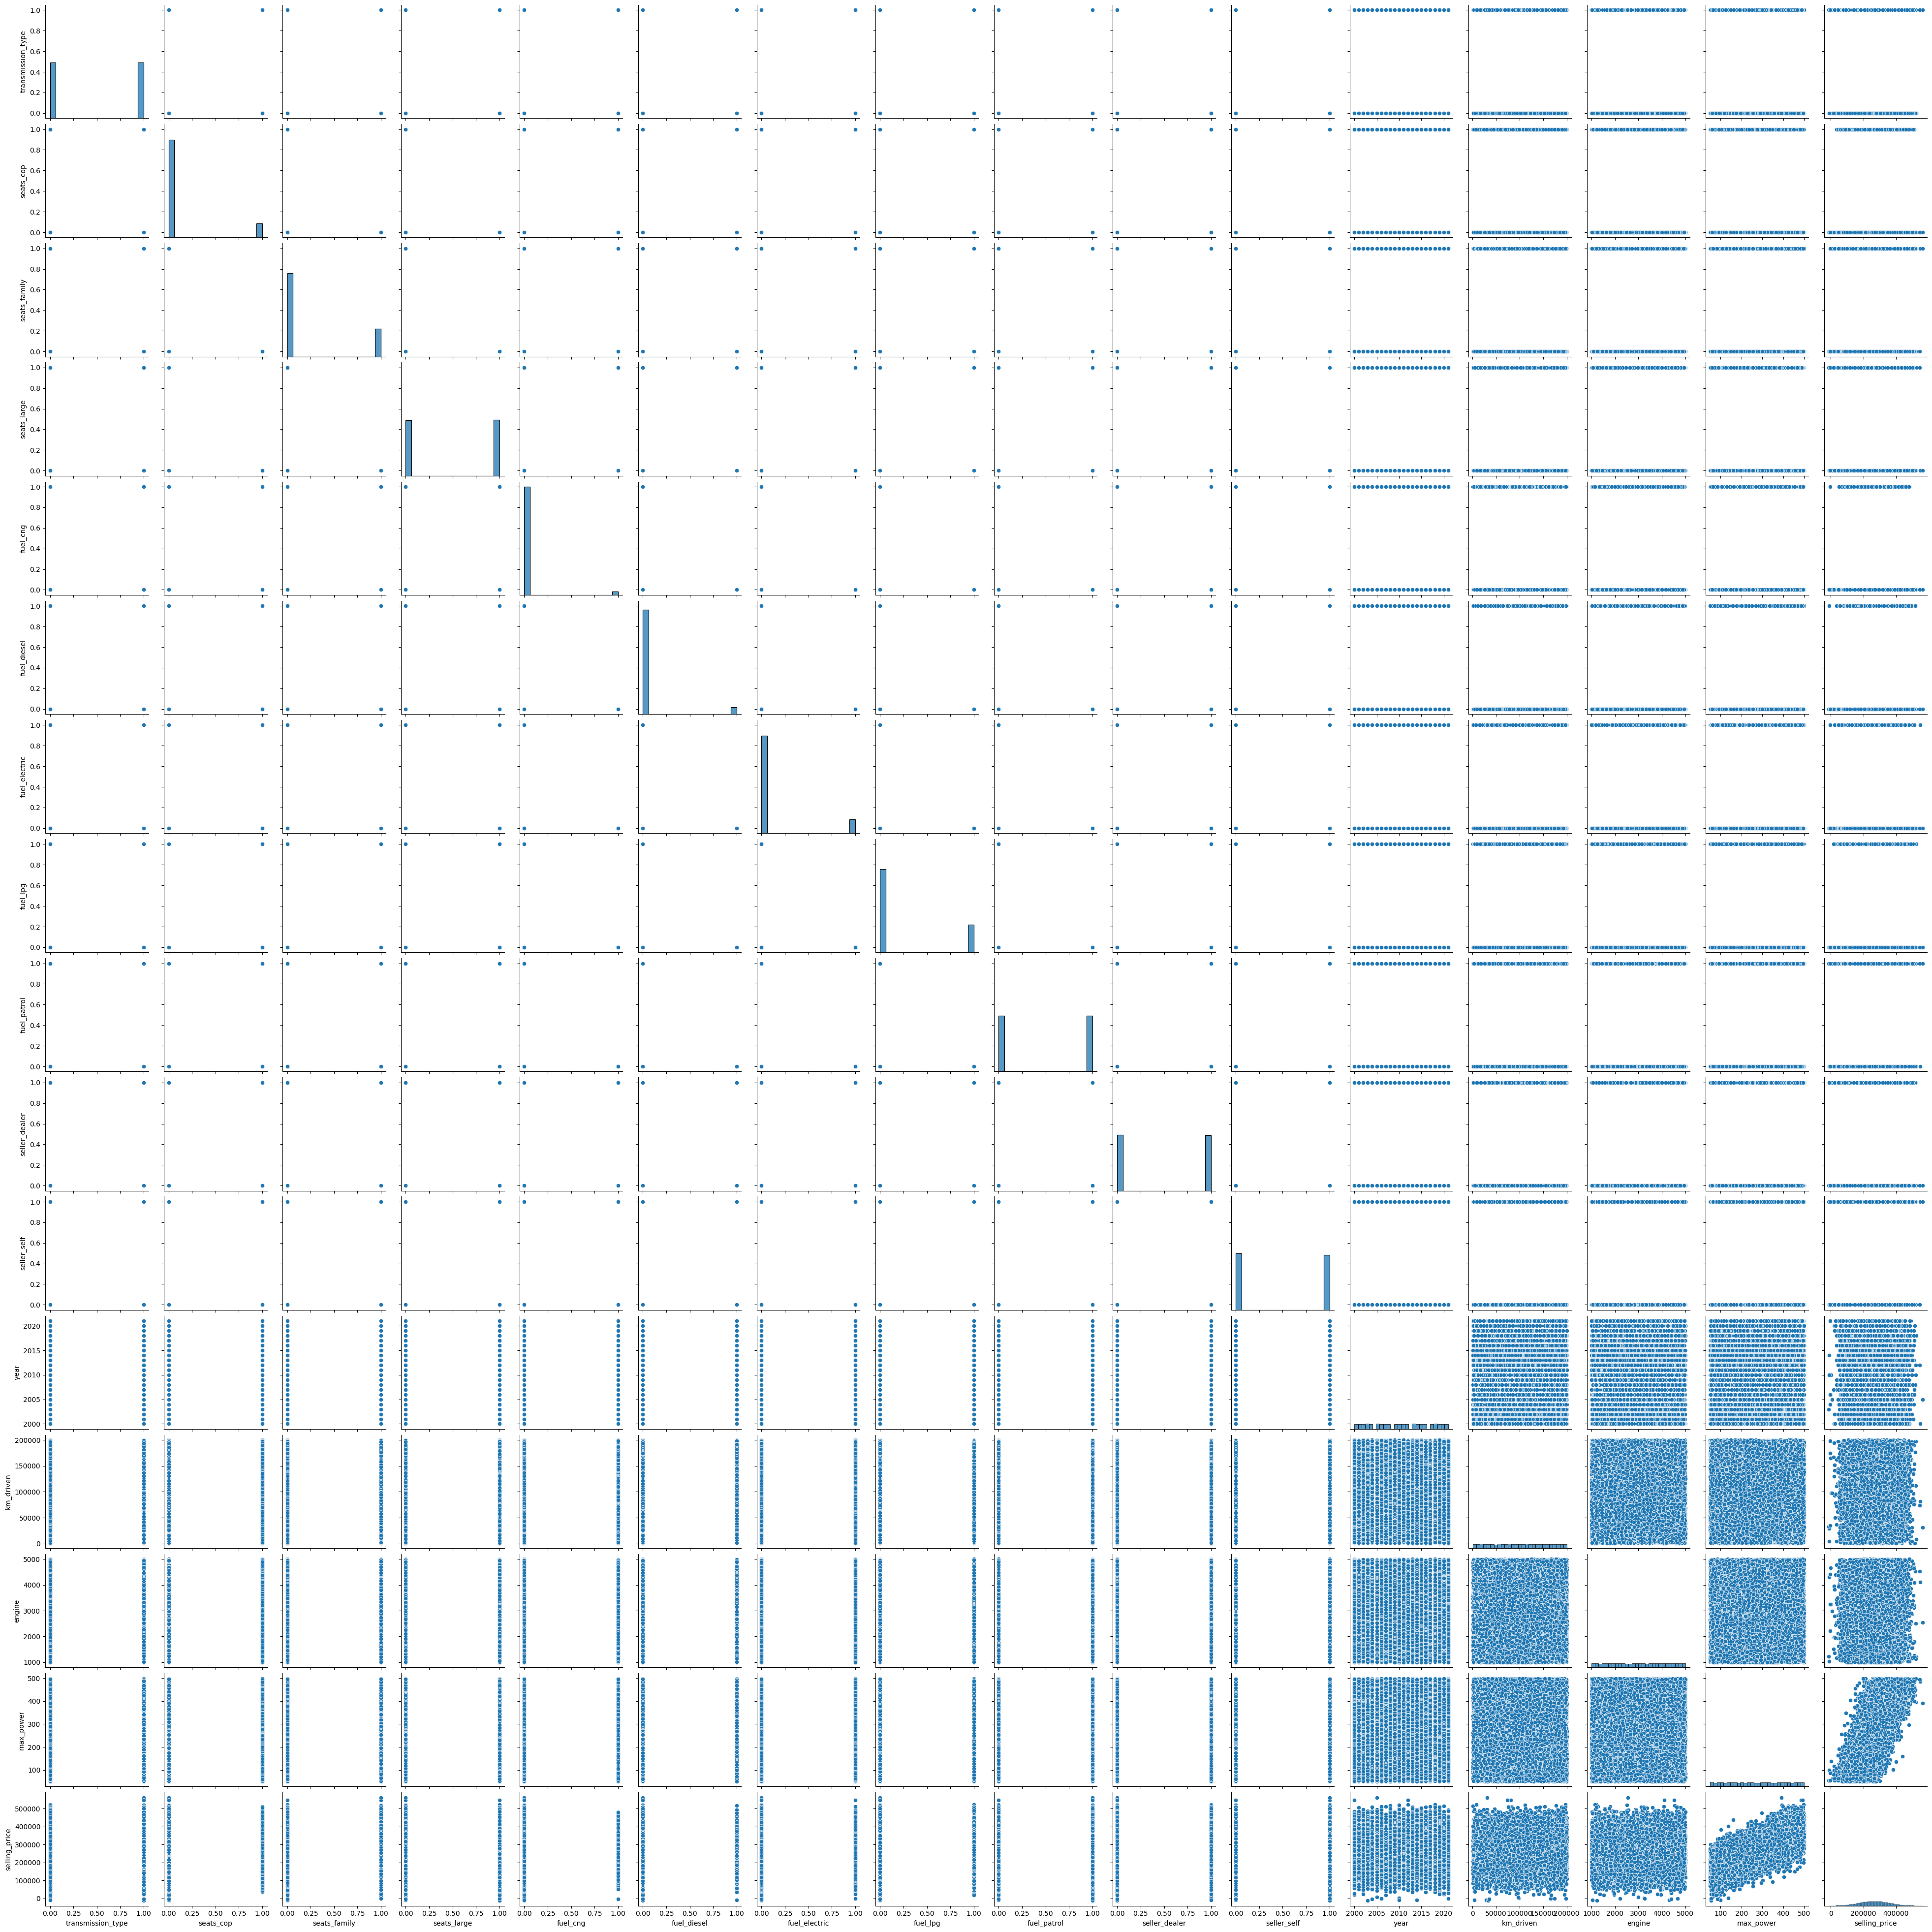

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

In [ ]:
X = df["max_power"]
Y = df["selling_price"]
u = X.mean()
std = X.std()
y=Y
X = (X-u)/std


In [ ]:
def gd(X,y):
  weights=np.zeros(2)
  grads=np.zeros(2)
  m=5
  lr=0.01
  for i in range(m):
     error=0
     for j in range(X.shape[0]):
       h=weights[0]+weights[1]*X[j]
       grads[0]+=h-y[j]
       grads[1]+=(h-y[j])*X[j]
       error+=(h-y)**2
     weights[0]-=lr*grads[0]
     weights[1]-=lr*grads[1]

     print(error)
gd(X,y)


0        8.857667e+14
1        1.489169e+15
2        1.263910e+15
3        3.875123e+14
4        1.030787e+15
             ...     
19995    3.046508e+15
19996    1.554809e+15
19997    8.602728e+14
19998    6.730102e+14
19999    1.463951e+15
Name: selling_price, Length: 20000, dtype: float64
0        5.949919e+19
1        5.936682e+19
2        5.941236e+19
3        5.965047e+19
4        5.946403e+19
             ...     
19995    5.911826e+19
19996    5.935421e+19
19997    5.950566e+19
19998    5.955651e+19
19999    5.937174e+19
Name: selling_price, Length: 20000, dtype: float64
0        2.326543e+24
1        2.326569e+24
2        2.326560e+24
3        2.326513e+24
4        2.326550e+24
             ...     
19995    2.326618e+24
19996    2.326572e+24
19997    2.326542e+24
19998    2.326532e+24
19999    2.326568e+24
Name: selling_price, Length: 20000, dtype: float64
0        9.120582e+28
1        9.120581e+28
2        9.120581e+28
3        9.120582e+28
4        9.120581e+28
           

In [ ]:
import numpy as np

def gd(X, y):
    weights = np.zeros(2)
    # m is usually the number of samples, but you used it as 'epochs' (iterations)
    epochs = 100 # Increased iterations to see convergence
    lr = 0.01
    n_samples = X.shape[0] # We need this to average the gradients

    for i in range(epochs):
        # FIX 1: Reset gradients and error to 0 at the start of EVERY epoch
        grads = np.zeros(2)
        error = 0

        for j in range(n_samples):
            h = weights[0] + weights[1] * X[j]

            # Accumulate gradients
            grads[0] += (h - y[j])
            grads[1] += (h - y[j]) * X[j]

            # FIX 2: Calculate error for the specific sample 'j', not the whole 'y' array
            error += (h - y[j]) ** 2

        # FIX 3: Average the gradients (divide by n_samples)
        # If you don't do this, the steps are too big and the model explodes.
        weights[0] -= lr * (grads[0] / n_samples)
        weights[1] -= lr * (grads[1] / n_samples)

        # Print Mean Squared Error (Average error), not total error
        if i % 10 == 0: # Print every 10th step to reduce clutter
            print(f"Epoch {i}: MSE = {error / n_samples}")

    return weights

# Dummy data to test
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
final_weights = gd(X, y)
print(f"Final Weights: {final_weights}")

Epoch 0: MSE = 17.2
Epoch 10: MSE = 2.4030685768538143
Epoch 20: MSE = 1.191321624271604
Epoch 30: MSE = 1.0751473533333629
Epoch 40: MSE = 1.0478896730258493
Epoch 50: MSE = 1.0283938529703385
Epoch 60: MSE = 1.0100991930481613
Epoch 70: MSE = 0.9924577649571675
Epoch 80: MSE = 0.9754068935897005
Epoch 90: MSE = 0.9589236301418465
Final Weights: [0.60511647 1.04175305]


In [ ]:
import numpy as np

def gd_vectorized(X, y):
    # Initialize weights: [intercept, slope]
    weights = np.zeros(2)
    lr = 0.01
    epochs = 100
    n_samples = X.shape[0]

    for i in range(epochs):
        # 1. Vectorized Prediction
        # We calculate predictions for ALL 5 samples at once
        # weights[1] is slope, weights[0] is intercept
        y_pred = weights[1] * X + weights[0]

        # 2. Vectorized Error Calculation
        error = y_pred - y

        # 3. Vectorized Gradient Calculation
        # Dot product replaces the sum(error * X) loop
        d_slope = (2 / n_samples) * np.dot(error, X)
        d_intercept = (2 / n_samples) * np.sum(error)

        # 4. Update Weights
        weights[1] -= lr * d_slope
        weights[0] -= lr * d_intercept

        # Optional: Print error occasionally
        if i % 10 == 0:
            mse = np.mean(error ** 2)
            print(f"Epoch {i}: MSE = {mse}")

    return weights

# Test Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

final_weights = gd_vectorized(X, y)
print(f"Final Weights: {final_weights}")

Epoch 0: MSE = 17.2
Epoch 10: MSE = 1.1594791891009735
Epoch 20: MSE = 1.0474743298290519
Epoch 30: MSE = 1.01000507634194
Epoch 40: MSE = 0.9752932416613062
Epoch 50: MSE = 0.9428560838305579
Epoch 60: MSE = 0.9125432676722957
Epoch 70: MSE = 0.8842156621823989
Epoch 80: MSE = 0.8577432542942607
Epoch 90: MSE = 0.8330045456289887
Final Weights: [0.85375107 0.97288937]


In [ ]:
import numpy as np  # Importing NumPy library for numerical computing
import matplotlib.pyplot as plt  # Importing Matplotlib library for creating plots and visualizations

# Set a seed for reproducibility
np.random.seed(1)

# Generate random data for x
X = np.arange(50)

# Define a polynomial relationship between x and y with some noise
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3*(X) + \


SyntaxError: invalid syntax (ipython-input-2214492574.py, line 16)

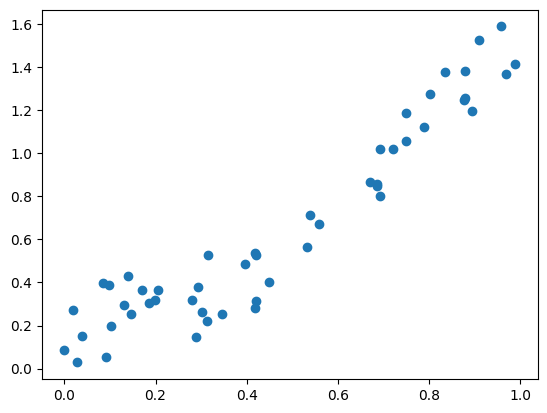

In [ ]:
# Create a figure to plot the data


# Scatter plot the data points
plt.scatter(X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model from scikit-learn
from sklearn.preprocessing import StandardScaler

In [ ]:
poly=PolynomialFeatures(100000)
scaler=StandardScaler()
x_poly=poly.fit_transform(x)
x_scale=scaler.fit_transform(x_poly)
lr=LinearRegression()
lr.fit(x_scale,y)
lr.score(x_scale,y)

0.32962189016830334

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(0)
n_samples=30

In [ ]:
X=np.sort(np.random.rand(n_samples))
y_true=np.sin(2*np.pi*X).ravel()
y_true.shape
y = y_true + np.random.randn(n_samples) * 0.2

ValueError: Found array with dim 6. PolynomialFeatures expected <= 2.

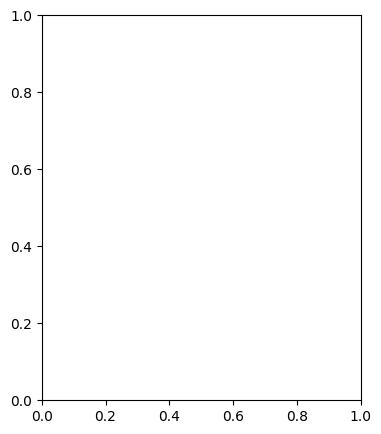

In [ ]:
X=X[:,np.newaxis]
degrees=[1,4,15]
titles=['underfitting','good fit','overfitting']
plt.figure(figsize=(14,5))
for i,degree in enumerate(degrees):
  ax = plt.subplot(1, len(degrees), i + 1)
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  pipeline.fit(X, y)
  X_test = np.linspace(0, 1, 100)[:,np.newaxis]
  y_pred = pipeline.predict(X_test)
  train_mse = mean_squared_error(y, pipeline.predict(X))

    # Plot the original data points
  plt.scatter(X, y, edgecolor='b', s=20, label="Training Data Points")
  # Plot the true function
  plt.plot(X_test, np.sin(2 * np.pi * X_test), label="True Function", color='g', linewidth=2)
  # Plot the model's learned curve
  plt.plot(X_test, y_pred, label="Model (Degree {})".format(degree), color='r', linewidth=2)

  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 1))
  plt.ylim((-1.5, 1.5))
  plt.legend(loc="best")
  plt.title(f"Degree {degree}\n{titles[i]}\nTrain MSE: {train_mse:.2f}")
plt.suptitle("Bias-Variance Tradeoff Demonstration", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

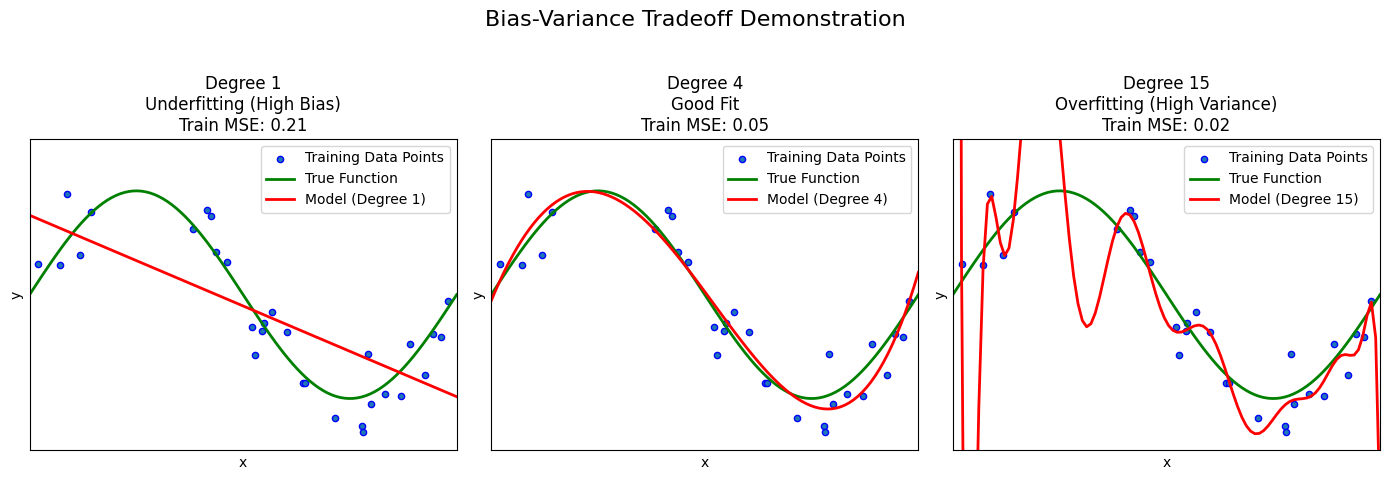

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

# 1. Generate the true function and noisy data
np.random.seed(0)
n_samples = 30

# True function is a sine wave
X = np.sort(np.random.rand(n_samples))
y_true = np.sin(2 * np.pi * X).ravel()
# Add noise to create the training data
y = y_true + np.random.randn(n_samples) * 0.2

# Reshape X for scikit-learn
X = X[:, np.newaxis]

# 2. Define degrees to test
degrees = [1, 4, 15]
titles = ['Underfitting (High Bias)', 'Good Fit', 'Overfitting (High Variance)']

plt.figure(figsize=(14, 5))

# 3. Loop through each degree and fit the model
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Create a pipeline to add polynomial features, then fit a linear regression
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    # 4. Plot the results
    # Create a smooth line for plotting the model's prediction
    X_test = np.linspace(0, 1, 100)[:, np.newaxis]
    y_pred = pipeline.predict(X_test)

    # Calculate and display the Mean Squared Error (MSE) on the training data
    train_mse = mean_squared_error(y, pipeline.predict(X))

    # Plot the original data points
    plt.scatter(X, y, edgecolor='b', s=20, label="Training Data Points")
    # Plot the true function
    plt.plot(X_test, np.sin(2 * np.pi * X_test), label="True Function", color='g', linewidth=2)
    # Plot the model's learned curve
    plt.plot(X_test, y_pred, label="Model (Degree {})".format(degree), color='r', linewidth=2)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}\n{titles[i]}\nTrain MSE: {train_mse:.2f}")

plt.suptitle("Bias-Variance Tradeoff Demonstration", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

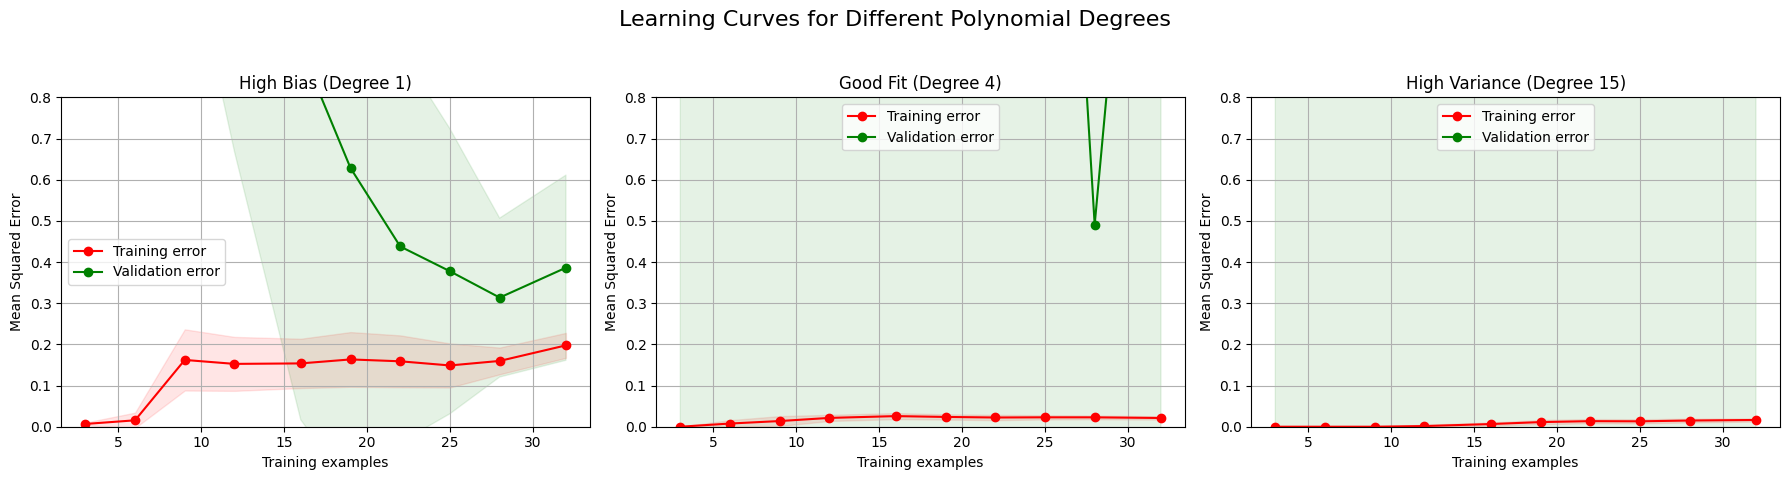

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# 1. Generate the same data as before
np.random.seed(0)
n_samples = 40 # Using a few more samples for a smoother curve
X = np.sort(np.random.rand(n_samples))
y_true = np.sin(2 * np.pi * X).ravel()
y = y_true + np.random.randn(n_samples) * 0.2
X = X[:, np.newaxis]

# Define degrees to test
degrees = [1, 4, 15]
titles = ['High Bias (Degree 1)', 'Good Fit (Degree 4)', 'High Variance (Degree 15)']

plt.figure(figsize=(18, 5))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Create the pipeline
    pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                         ("linear_regression", LinearRegression())])

    # 2. Use the learning_curve function
    # It automatically handles cross-validation and training on different subset sizes
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline,
        X,
        y,
        cv=5,
        n_jobs=-1,
        scoring="neg_mean_squared_error", # We use negative MSE because the utility expects a "score" (higher is better)
        train_sizes=np.linspace(0.1, 1.0, 10) # Test 10 different training set sizes
    )

    # 3. Calculate mean and std dev for plotting
    # We flip the sign of MSE to get positive error values
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 4. Plot the curves
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation error")

    ax.set_title(titles[i])
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Mean Squared Error")
    ax.legend(loc="best")
    ax.set_ylim(0, 0.8) # Set a consistent y-axis limit

plt.suptitle("Learning Curves for Different Polynomial Degrees", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

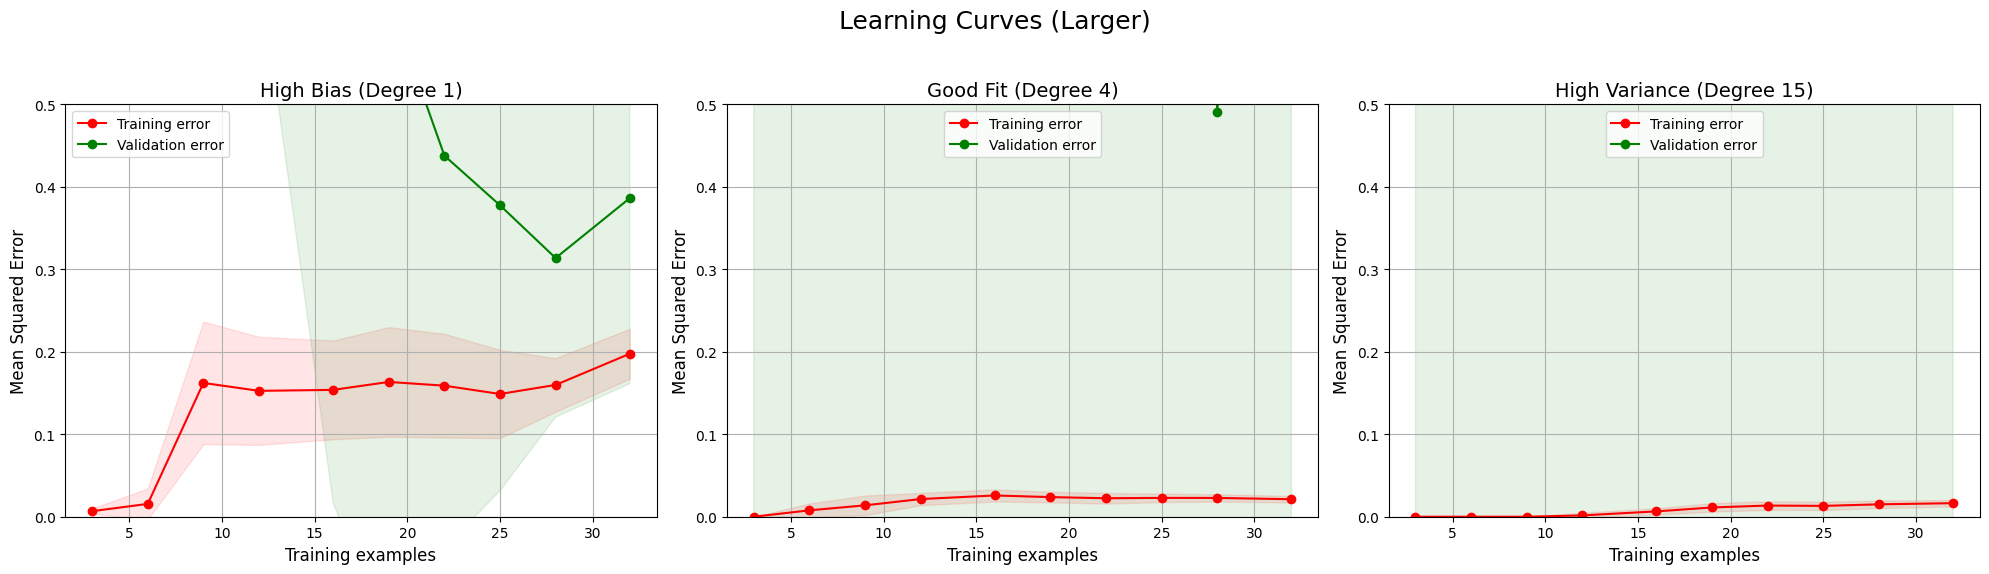

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# 1. Generate the same data as before
np.random.seed(0)
n_samples = 40
X = np.sort(np.random.rand(n_samples))
y_true = np.sin(2 * np.pi * X).ravel()
y = y_true + np.random.randn(n_samples) * 0.2
X = X[:, np.newaxis]

# Define degrees to test
degrees = [1, 4, 15]
titles = ['High Bias (Degree 1)', 'Good Fit (Degree 4)', 'High Variance (Degree 15)']

# --- KEY CHANGE HERE ---
# Increased the figsize from (18, 5) to (20, 6) for a larger, clearer image
plt.figure(figsize=(20, 6))

for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Create the pipeline
    pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=degree, include_bias=False)),
                         ("linear_regression", LinearRegression())])

    # 2. Use the learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline,
        X,
        y,
        cv=5,
        n_jobs=-1,
        scoring="neg_mean_squared_error",
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # 3. Calculate mean and std dev for plotting
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # 4. Plot the curves
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation error")

    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel("Training examples", fontsize=12)
    ax.set_ylabel("Mean Squared Error", fontsize=12)
    ax.legend(loc="best")

    # --- KEY CHANGE HERE ---
    # Adjusted y-axis limit to focus on the 0 to 0.5 error range
    ax.set_ylim(0, 0.5)

plt.suptitle("Learning Curves (Larger)", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Case Study

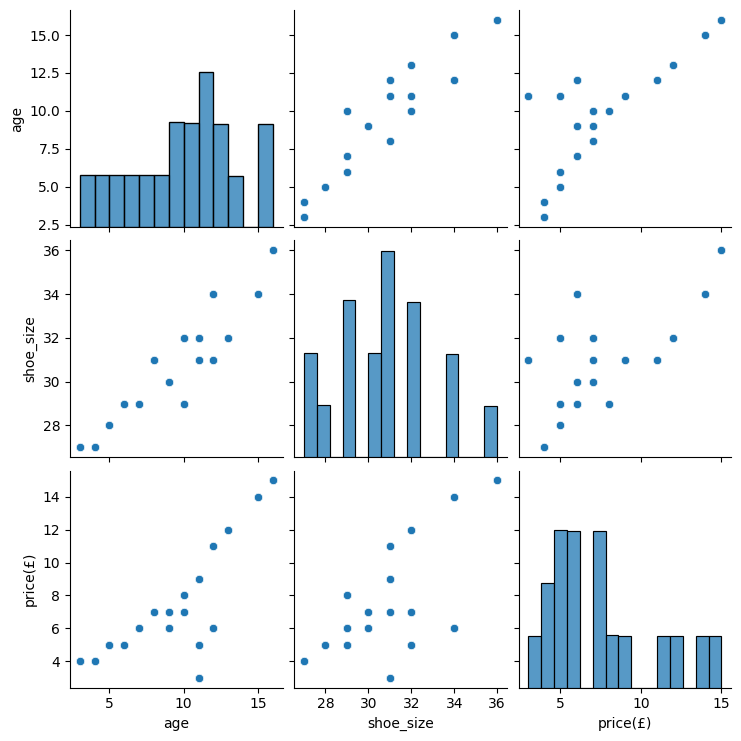

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv("exploring_dataset.csv")
df.head()
sns.pairplot(df)

In [ ]:
df.describe()

,age,shoe_size,price(£)
count,1000.000000,1000.00000,1000.000000
mean,9.532000,30.70700,7.427000
std,3.484985,2.35174,3.361841
min,3.000000,27.00000,3.000000
25%,7.000000,29.00000,5.000000
50%,10.000000,31.00000,6.000000
75%,12.000000,32.00000,9.000000
max,16.000000,36.00000,15.000000


In [ ]:
df.shape

(1000, 4)

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- 1. Setup: Create a 3-Class Dataset ---
# We'll create a dataset with 3 distinct classes
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=0,
    n_classes=3,      # <-- This makes it a multi-class problem
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data shape: {X.shape}")
print(f"Classes: {np.unique(y)}\n")

# --- 2. Implementation 1: One-vs-Rest (OvR) ---
# This is often the default, but we'll set it explicitly.
# We use 'liblinear' because it's a good solver for OvR.

print("--- Training One-vs-Rest (OvR) Model ---")
ovr_model = LogisticRegression(
    multi_class='ovr',   # <-- This is the key parameter
    solver='liblinear'   # <-- 'liblinear' solver works well with OvR
)

# Train the model
ovr_model.fit(X_train, y_train)

# Make predictions
ovr_preds = ovr_model.predict(X_test)
ovr_accuracy = accuracy_score(y_test, ovr_preds)
print(f"OvR Model Accuracy: {ovr_accuracy:.4f}")

# Show the predicted probabilities for the first 2 test samples
# Each row represents a sample. Each column is the probability for (Class 0, Class 1, Class 2).
# These are calculated by 3 independent models and then normalized.
ovr_probs = ovr_model.predict_proba(X_test[:2])
print(f"OvR Probabilities (first 2 samples):\n{ovr_probs}\n")


# --- 3. Implementation 2: Softmax (Multinomial) ---
# This trains a single model for all classes at once.
# IMPORTANT: You MUST use a solver that supports it, like 'lbfgs' or 'newton-cg'.
# 'liblinear' does NOT support 'multinomial'.

print("--- Training Softmax (Multinomial) Model ---")
softmax_model = LogisticRegression(
    multi_class='multinomial',  # <-- This is the key parameter
    solver='lbfgs'              # <-- 'lbfgs' is required for multinomial
)

# Train the model
softmax_model.fit(X_train, y_train)

# Make predictions
softmax_preds = softmax_model.predict(X_test)
softmax_accuracy = accuracy_score(y_test, softmax_preds)
print(f"Softmax Model Accuracy: {softmax_accuracy:.4f}")

# Show the predicted probabilities for the first 2 test samples
# These probabilities are calculated together and are guaranteed to sum to 1.
softmax_probs = softmax_model.predict_proba(X_test[:2])
print(f"Softmax Probabilities (first 2 samples):\n{softmax_probs}\n")

Data shape: (1000, 10)
Classes: [0 1 2]

--- Training One-vs-Rest (OvR) Model ---
OvR Model Accuracy: 0.6900
OvR Probabilities (first 2 samples):
[[4.72309883e-04 3.33704308e-01 6.65823382e-01]
 [1.33417182e-01 5.02082582e-01 3.64500236e-01]]

--- Training Softmax (Multinomial) Model ---
Softmax Model Accuracy: 0.7150
Softmax Probabilities (first 2 samples):
[[7.35985056e-04 2.34430812e-01 7.64833203e-01]
 [1.15575350e-01 4.26483432e-01 4.57941218e-01]]



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
